# Project 2 – Web Scraped Data Analysis and Visualizations
### Alexis Brito
### November 2025
### Goal : Develop a web scraping pipeline to collect data from at least five web pages, clean it, and store it in a Pandas DataFrame. Perform and visualize data analysis using Seaborn to answer at least four questions, including two shown through labeled and styled plots.

### Import library

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

### Create four different functions to scrape web pages. I made four because I need to access four different tables to extract the data.

### Each function uses a similar algorithm for web scraping.

In [2]:
#  Scrape team batting statistics for a given year from Baseball Reference
def team_batting(year):
    url = f"https://www.baseball-reference.com/leagues/majors/{year}.shtml"
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
    #I look up in some AI ways to scrape a with out been banned 
    #I use a header and timeout to act similar to a human 
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
        
    soup = bs(response.content, 'html.parser')
        
    team_batting_table = soup.find('table', {'id': 'teams_standard_batting'})
        
    if team_batting_table:
        # Convert table to DataFrame
        df = pd.read_html(str(team_batting_table))[0]
        df['Year'] = year
        return df
    else:
        #I used some print statements to indicate when the function doesn’t get the data.
        print(f"Team batting table not found for {year}")
        return None
            

In [3]:
#Scrape team standings (W/L records) for a given year from Baseball Reference

def team_standings(year):
    url = f"https://www.baseball-reference.com/leagues/majors/{year}-standings.shtml"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
        
    soup = bs(response.content, 'html.parser')
        
    all_standings = []
    
    tables = soup.find_all('table')
        
    for table in tables:
        table_id = table.get('id', '')
        if 'standings' in table_id.lower() or 'expanded' in table_id.lower():
            df = pd.read_html(str(table))[0]
            # it has W and L columns
            if 'W' in str(df.columns) and 'L' in str(df.columns):
                all_standings.append(df)

    if all_standings:
        standings_df = pd.concat(all_standings, ignore_index=True)
        standings_df['Year'] = year
        return standings_df
    else:
        print(f"Team standings not found for {year}")
        return None

In [4]:
#Scrape pitching leaders from the dedicated leaders page
def pitching_lead(year):
    url = f"https://www.baseball-reference.com/leagues/majors/{year}-standard-pitching.shtml"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
        
    soup = bs(response.content, 'html.parser')
        
    table = soup.find('table', {'id': 'players_standard_pitching'})
        
    if table:
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        return df
    else:
        print(f"Pitching leaders table not found for {year}")
        return None

In [5]:
#Scrape batting leaders from the dedicated leaders page
def batting_lead(year):

    url = f"https://www.baseball-reference.com/leagues/majors/{year}-standard-batting.shtml"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
        
    soup = bs(response.content, 'html.parser')
        
    # Find the main batting stats table
    table = soup.find('table', {'id': 'players_standard_batting'})
        
    if table:
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        return df
    else:
        print(f"Batting leaders table not found for {year}")
        return None

### Create a list with the different years to scrape the data.

In [6]:
years = [2020, 2021, 2022, 2023, 2024]

### Using a for loop to iterate through the different functions for each year

In [7]:
team_batting_dfs = []
for year in years:
    print(f"Scraping team batting stats for {year}...")
    df = team_batting(year)
    if df is not None:
        team_batting_dfs.append(df)
        # Again using some print to display a successfully scraped
        print(f"Successfully scraped")
    time.sleep(1) 

Scraping team batting stats for 2020...
Successfully scraped
Scraping team batting stats for 2021...
Successfully scraped
Scraping team batting stats for 2022...
Successfully scraped
Scraping team batting stats for 2023...
Successfully scraped
Scraping team batting stats for 2024...
Successfully scraped


In [8]:
team_standings_dfs = []
for year in years:
    print(f"Scraping team standings for {year}...")
    df = team_standings(year)
    if df is not None:
        team_standings_dfs.append(df)
        print(f"Successfully scraped standings")
    time.sleep(1)

Scraping team standings for 2020...
Successfully scraped standings
Scraping team standings for 2021...
Successfully scraped standings
Scraping team standings for 2022...
Successfully scraped standings
Scraping team standings for 2023...
Successfully scraped standings
Scraping team standings for 2024...
Successfully scraped standings


In [9]:
player_batting_dfs = []
for year in years:
    print(f"Scraping player batting leaders for {year}...")
    df = batting_lead(year)
    if df is not None:
        player_batting_dfs.append(df)
        print(f"Successfully scraped batting leaders")
    time.sleep(1)

Scraping player batting leaders for 2020...
Successfully scraped batting leaders
Scraping player batting leaders for 2021...
Successfully scraped batting leaders
Scraping player batting leaders for 2022...
Successfully scraped batting leaders
Scraping player batting leaders for 2023...
Successfully scraped batting leaders
Scraping player batting leaders for 2024...
Successfully scraped batting leaders


In [10]:
player_pitching_dfs = []
for year in years:
    print(f"Scraping player pitching leaders for {year}...")
    df = pitching_lead(year)
    if df is not None:
        player_pitching_dfs.append(df)
        print(f"Successfully scraped pitching leaders")
    time.sleep(1)


Scraping player pitching leaders for 2020...
Successfully scraped pitching leaders
Scraping player pitching leaders for 2021...
Successfully scraped pitching leaders
Scraping player pitching leaders for 2022...
Successfully scraped pitching leaders
Scraping player pitching leaders for 2023...
Successfully scraped pitching leaders
Scraping player pitching leaders for 2024...
Successfully scraped pitching leaders


In [11]:
# Combine team batting dataframes
if team_batting_dfs:
    team_batting_df = pd.concat(team_batting_dfs, ignore_index=True)
else:
    print("No team batting data collected!")
    team_batting_df = pd.DataFrame()

# Combine team standings dataframes
if team_standings_dfs:
    team_standings_df = pd.concat(team_standings_dfs, ignore_index=True)
else:
    print("Team standings data collected!")
    team_standings_df = pd.DataFrame()

# Combine player batting dataframes
if player_batting_dfs:
    player_batting_df = pd.concat(player_batting_dfs, ignore_index=True)
else:
    print("Player batting data collected!")
    player_batting_df = pd.DataFrame()

# Combine player pitching dataframes
if player_pitching_dfs:
    player_pitching_df = pd.concat(player_pitching_dfs, ignore_index=True)
else:
    print("Player pitching data collected!")
    player_pitching_df = pd.DataFrame()


### Cleaning team batting data

In [12]:
# filtering out unwanted rows from team_batting_df
team_batting_df = team_batting_df[~team_batting_df['Tm'].astype(str).str.contains('Avg', na=False)]
team_batting_df = team_batting_df[team_batting_df['Tm'].astype(str) != 'Tm']


In [13]:
# Convert numeric columns for team batting
numeric_cols_batting = ['R', 'AB', 'H', 'HR', 'RBI', 'SB', 'BA', 'OBP', 'SLG', 'OPS']
for col in numeric_cols_batting:
    if col in team_batting_df.columns:
        team_batting_df[col] = pd.to_numeric(team_batting_df[col], errors='coerce')


### I used AI assistance to help with issues related to the table’s multi-index.


### The block I used to clean the data contains similar code, but I repeated it for different DataFrames.

In [26]:
if not team_standings_df.empty:
    
    # Handle multi-index columns if present
    if isinstance(team_standings_df.columns, pd.MultiIndex):
        team_standings_df.columns = team_standings_df.columns.get_level_values(-1)
    
    # Remove header rows
    team_standings_df = team_standings_df[team_standings_df['Tm'].astype(str) != 'Tm']
    
    # Convert W and L to numeric
    for col in ['W', 'L']:
        if col in team_standings_df.columns:
            team_standings_df[col] = pd.to_numeric(team_standings_df[col], errors='coerce')
    
    # Merge and clean team name standings with batting data
    team_standings_df['Tm_clean'] = team_standings_df['Tm'].str.replace('*', '', regex=False)
    team_batting_df['Tm_clean'] = team_batting_df['Tm'].str.replace('*', '', regex=False)

    # Merge the dataframes
    team_batting_df = team_batting_df.merge(
        team_standings_df[['Tm_clean', 'W', 'L', 'Year']], 
        on=['Tm_clean', 'Year'], 
        how='left'
    )

### I repeated the same process with some changes in each DataFrame.

In [15]:
if not player_batting_df.empty:
    
    # Handle multi-index columns if present
    if isinstance(player_batting_df.columns, pd.MultiIndex):
        player_batting_df.columns = player_batting_df.columns.get_level_values(-1)
    
    name_col = 'Name' if 'Name' in player_batting_df.columns else 'Player'
    if name_col in player_batting_df.columns:
        player_batting_df = player_batting_df[player_batting_df[name_col].astype(str) != name_col]
        player_batting_df = player_batting_df[player_batting_df[name_col].astype(str) != 'Name']
        
        if name_col != 'Name':
            player_batting_df['Name'] = player_batting_df[name_col]
    
    player_numeric_cols = ['HR', 'RBI', 'AB', 'H', 'OPS', 'OBP', 'SLG', 'BA']
    for col in player_numeric_cols:
        if col in player_batting_df.columns:
            player_batting_df[col] = pd.to_numeric(player_batting_df[col], errors='coerce')
    
    # Dropping players that do not meet the requirements. 
    if 'AB' in player_batting_df.columns:
        player_batting_df = player_batting_df[player_batting_df['AB'] >= 100]

In [16]:
if not player_pitching_df.empty:
    
    if isinstance(player_pitching_df.columns, pd.MultiIndex):
        player_pitching_df.columns = player_pitching_df.columns.get_level_values(-1)
    
    name_col = 'Name' if 'Name' in player_pitching_df.columns else 'Player'
    if name_col in player_pitching_df.columns:
        player_pitching_df = player_pitching_df[player_pitching_df[name_col].astype(str) != name_col]
        player_pitching_df = player_pitching_df[player_pitching_df[name_col].astype(str) != 'Name']
        
        if name_col != 'Name':
            player_pitching_df['Name'] = player_pitching_df[name_col]
    
    pitcher_numeric_cols = ['SO', 'IP', 'W', 'L', 'ERA', 'BB', 'H']
    for col in pitcher_numeric_cols:
        if col in player_pitching_df.columns:
            player_pitching_df[col] = pd.to_numeric(player_pitching_df[col], errors='coerce')
    
    # Remove pitchers with insufficient innings
    if 'IP' in player_pitching_df.columns:
        player_pitching_df = player_pitching_df[player_pitching_df['IP'] >= 50]

### I used this part to store the data for each question. I displayed some sample data for each question, which helped me later when creating the graphs.

In [17]:
#Question 1: Who were the top 5 home run hitters in each MLB season?
if not player_batting_df.empty and 'HR' in player_batting_df.columns:
    top_hr_by_year = {}
    for year in years:
        year_data = player_batting_df[player_batting_df['Year'] == year]
        if not year_data.empty:
            top_5 = year_data.nlargest(5, 'HR')[['Name', 'HR', 'Year']]
            if 'Tm' in year_data.columns:
                top_5 = year_data.nlargest(5, 'HR')[['Name', 'Tm', 'HR', 'Year']]
            top_hr_by_year[year] = top_5
            print(f"\n{year} Top 5 Home Run Hitters:")
            for idx, row in top_5.iterrows():
                player_name = str(row['Name'])
                team_info = f" ({row['Tm']})" if 'Tm' in row else ""
                print(f"  {player_name:30s}{team_info} - {int(row['HR'])} HR")
else:
    print("Player batting data not available. Using team-level HR data instead.")
    top_hr_by_year = {}
    for year in years:
        year_data = team_batting_df[team_batting_df['Year'] == year]
        if not year_data.empty and 'HR' in year_data.columns:
            top_5 = year_data.nlargest(5, 'HR')[['Tm', 'HR', 'Year']]
            print(f"\n{year} Top 5 Teams by Home Runs:")
            for idx, row in top_5.iterrows():
                print(f"  {row['Tm']:30s} - {int(row['HR'])} HR")



2020 Top 5 Home Run Hitters:
  Luke Voit                      - 22 HR
  José Abreu                     - 19 HR
  Marcell Ozuna                  - 18 HR
  Fernando Tatis Jr.             - 17 HR
  José Ramírez#                  - 17 HR

2021 Top 5 Home Run Hitters:
  Vladimir Guerrero Jr.          - 48 HR
  Salvador Perez                 - 48 HR
  Shohei Ohtani*                 - 46 HR
  Marcus Semien                  - 45 HR
  Fernando Tatis Jr.             - 42 HR

2022 Top 5 Home Run Hitters:
  Aaron Judge                    - 62 HR
  Kyle Schwarber*                - 46 HR
  Pete Alonso                    - 40 HR
  Mike Trout                     - 40 HR
  Austin Riley                   - 38 HR

2023 Top 5 Home Run Hitters:
  Matt Olson*                    - 54 HR
  Kyle Schwarber*                - 47 HR
  Pete Alonso                    - 46 HR
  Shohei Ohtani*                 - 44 HR
  Ronald Acuña Jr.               - 41 HR

2024 Top 5 Home Run Hitters:
  Aaron Judge                 

In [18]:
#Question 2: Which teams had the highest combined OPS each year?
if 'OPS' in team_batting_df.columns:
    top_ops_by_year = {}
    for year in years:
        year_data = team_batting_df[team_batting_df['Year'] == year]
        if not year_data.empty:
            top_team = year_data.nlargest(1, 'OPS')[['Tm', 'OPS', 'Year']]
            top_ops_by_year[year] = top_team
            team_name = str(top_team['Tm'].values[0]).replace('*', '')
            print(f"\n{year}: {team_name} - OPS: {top_team['OPS'].values[0]:.3f}")
else:
    print("OPS data not available in team batting data")
    top_ops_by_year = {}



2020: Atlanta Braves - OPS: 0.832

2021: Toronto Blue Jays - OPS: 0.797

2022: Los Angeles Dodgers - OPS: 0.775

2023: Atlanta Braves - OPS: 0.845

2024: Los Angeles Dodgers - OPS: 0.781


In [19]:
#Question 3: Who were the top 5 pitchers with more strikeouts in each MLB season?
if not player_pitching_df.empty and 'SO' in player_pitching_df.columns:
    top_so_by_year = {}
    for year in years:
        year_data = player_pitching_df[player_pitching_df['Year'] == year]
        if not year_data.empty:
            top_5 = year_data.nlargest(5, 'SO')[['Name', 'SO', 'Year']]
            if 'Tm' in year_data.columns:
                top_5 = year_data.nlargest(5, 'SO')[['Name', 'Tm', 'SO', 'Year']]
            top_so_by_year[year] = top_5
            print(f"\n{year} Top 5 Strikeout Leaders:")
            for idx, row in top_5.iterrows():
                pitcher_name = str(row['Name'])
                team_info = f" ({row['Tm']})" if 'Tm' in row else ""
                print(f"  {pitcher_name:30s}{team_info} - {int(row['SO'])} SO")
else:
    print("Player pitching data not available for this analysis")
    top_so_by_year = {}


2020 Top 5 Strikeout Leaders:
  Shane Bieber                   - 122 SO
  Jacob deGrom                   - 104 SO
  Trevor Bauer                   - 100 SO
  Lucas Giolito                  - 97 SO
  Aaron Nola                     - 96 SO

2021 Top 5 Strikeout Leaders:
  Robbie Ray*                    - 248 SO
  Zack Wheeler                   - 247 SO
  Gerrit Cole                    - 243 SO
  Max Scherzer                   - 236 SO
  Corbin Burnes                  - 234 SO

2022 Top 5 Strikeout Leaders:
  Gerrit Cole                    - 257 SO
  Corbin Burnes                  - 243 SO
  Carlos Rodón*                  - 237 SO
  Aaron Nola                     - 235 SO
  Dylan Cease                    - 227 SO

2023 Top 5 Strikeout Leaders:
  Spencer Strider                - 281 SO
  Kevin Gausman                  - 237 SO
  Pablo López                    - 234 SO
  Blake Snell*                   - 234 SO
  Gerrit Cole                    - 222 SO

2024 Top 5 Strikeout Leaders:
  Tarik

In [20]:
if 'W' in team_batting_df.columns:
    teams_100 = team_batting_df[team_batting_df['W'] >= 100].sort_values(['Tm', 'Year'])

    if not teams_100.empty:
        consecutive_100_win_teams = {}

        for team, group in teams_100.groupby('Tm'):
            years = sorted(group['Year'].unique())
            streaks = []
            streak = [years[0]]

            # Detect consecutive seasons
            for i in range(1, len(years)):
                if years[i] == years[i-1] + 1:
                    streak.append(years[i])
                else:
                    if len(streak) >= 2:
                        streaks.append(streak)
                    streak = [years[i]]

            if len(streak) >= 2:
                streaks.append(streak)

            if streaks:
                consecutive_100_win_teams[team] = streaks

        # Print results
        if consecutive_100_win_teams:
            for team, streaks in consecutive_100_win_teams.items():
                team_name = str(team).replace('*', '')
                for streak in streaks:
                    print(f"\n{team_name}:")
                    print(f"  Consecutive 100+ win seasons: {streak}")

                    win_totals = []
                    for year in streak:
                        wins = int(team_batting_df.loc[
                            (team_batting_df['Tm'] == team) &
                            (team_batting_df['Year'] == year), 'W'
                        ].iloc[0])
                        win_totals.append(f"{year}: {wins}W")

                    print(f"  Win totals: {', '.join(win_totals)}")
        else:
            print("No teams found with consecutive 100+ win seasons.")
    else:
        print("No teams found with 100+ wins in any season.")
else:
    print("Win/Loss data not available in team data.")



Atlanta Braves:
  Consecutive 100+ win seasons: [2022, 2023]
  Win totals: 2022: 101W, 2023: 104W

Los Angeles Dodgers:
  Consecutive 100+ win seasons: [2021, 2022, 2023]
  Win totals: 2021: 106W, 2022: 111W, 2023: 100W


## Data Visualization
### In this section, I answer the question with a graph and a brief analysis of the graph.

### Who were the top 5 home run hitters in each MLB season?


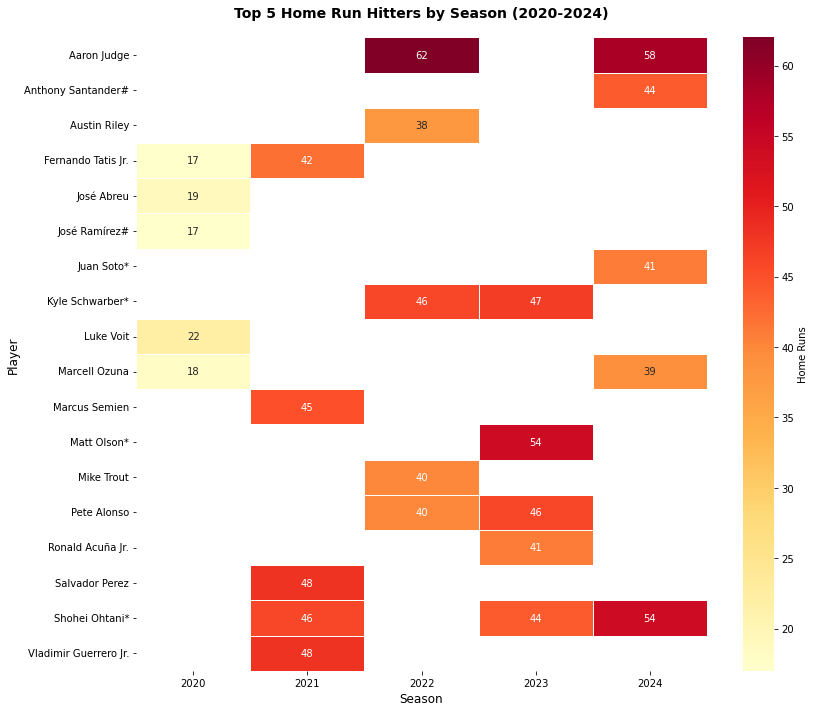

In [21]:
if top_hr_by_year and not player_batting_df.empty:
    # Prepare data for heatmap
    hr_data = []
    for year, df in sorted(top_hr_by_year.items()):
        for idx, row in df.iterrows():
            hr_data.append({
                'Year': year,
                'Player': row['Name'],
                'HR': row['HR']
            })
    
    hr_df = pd.DataFrame(hr_data)
    hr_pivot = hr_df.pivot_table(values='HR', index='Player', columns='Year', aggfunc='max')
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(hr_pivot, annot=True, fmt='.0f', cmap='YlOrRd', 
                cbar_kws={'label': 'Home Runs'}, linewidths=0.5, ax=ax)
    
    ax.set_xlabel('Season', fontsize=12)
    ax.set_ylabel('Player', fontsize=12)
    ax.set_title('Top 5 Home Run Hitters by Season (2020-2024)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

###  Here, you can see the different players who dominate the list of most home runs from 2020 to 2024. Some players appear only once, while others repeat several times. I selected a heatmap because it uses different colors to compare the number of home runs across different years.

### Which teams had the highest combined OPS each year?

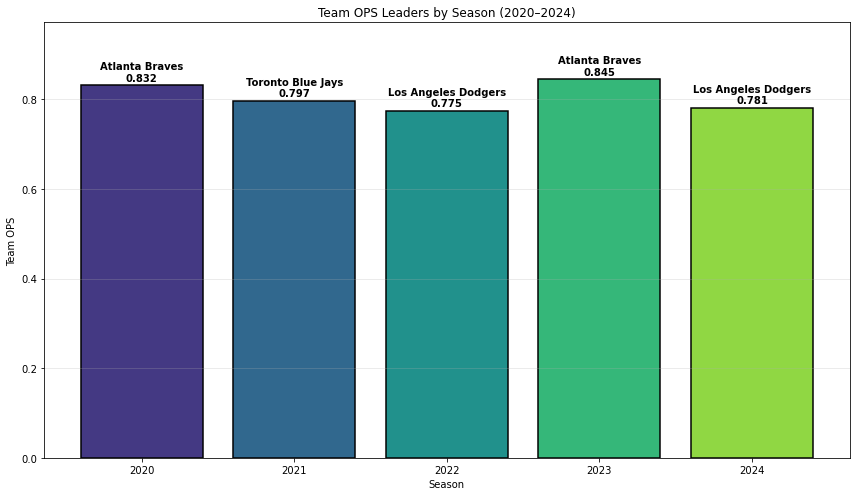

In [22]:
if top_ops_by_year:
    ops_plot_df = pd.DataFrame([{
        'Year': year, 
        'Team': str(df['Tm'].values[0]).replace('*', ''), 
        'OPS': df['OPS'].values[0]
    } for year, df in top_ops_by_year.items()])
    
    fig, ax = plt.subplots(figsize=(12, 7))
    colors = sns.color_palette("viridis", len(ops_plot_df))
    bars = ax.bar(
        ops_plot_df['Year'].astype(str), 
        ops_plot_df['OPS'], 
        color=colors, 
        edgecolor='black', 
        linewidth=1.5
    )
    
    # Add data labels
    for i, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2., 
            bar.get_height() + 0.005, 
            f"{ops_plot_df.iloc[i]['Team']}\n{ops_plot_df.iloc[i]['OPS']:.3f}",
            ha='center', 
            va='bottom', 
            fontsize=10, 
            fontweight='bold'
        )
    
    # Customize plot
    ax.set(
        xlabel='Season', 
        ylabel='Team OPS', 
        title='Team OPS Leaders by Season (2020–2024)'
    )
    ax.set_ylim(0, ops_plot_df['OPS'].max() * 1.15)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


### This is the team that dominates in terms of OPS, a metric that determines which team has the best slugging percentage each year. This bar graph provides a simple view of the information. As we que see those four teams dominate each year but one of them is over the others and other team have repeated the goal two different years

### Which team has more than 100 wins for two consecutive years or more?

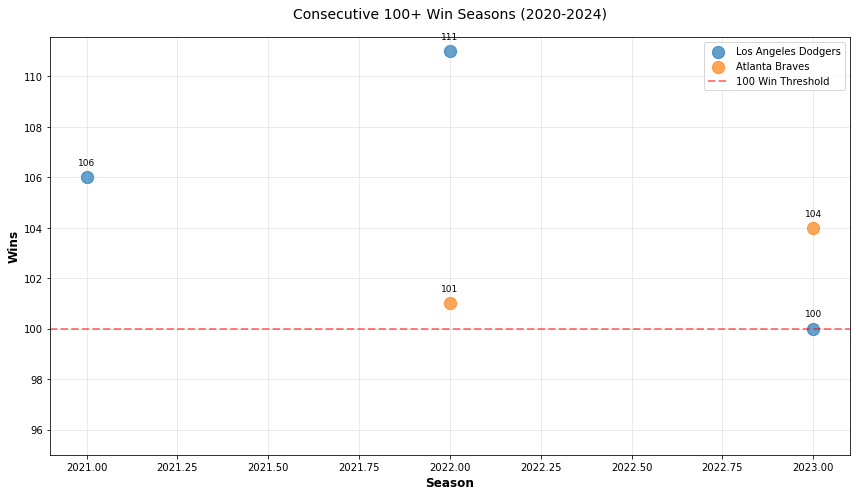

In [23]:
if 'W' in team_batting_df.columns:
    teams_100_wins = team_batting_df[team_batting_df['W'] >= 100]
    
    if not teams_100_wins.empty:
        # Find consecutive years
        consecutive_data = []
        for team in teams_100_wins['Tm'].unique():
            years = sorted(teams_100_wins[teams_100_wins['Tm'] == team]['Year'].unique())
            for i in range(len(years)-1):
                if years[i+1] == years[i] + 1:
                    for y in [years[i], years[i+1]]:
                        wins = team_batting_df[(team_batting_df['Tm'] == team) & (team_batting_df['Year'] == y)]['W'].values[0]
                        consecutive_data.append({'Team': str(team).replace('*', ''), 'Year': y, 'Wins': wins})
        
        if consecutive_data:
            fig, ax = plt.subplots(figsize=(12, 7))
            win_plot_df = pd.DataFrame(consecutive_data).drop_duplicates()
            
            for team in win_plot_df['Team'].unique():
                team_data = win_plot_df[win_plot_df['Team'] == team]
                ax.scatter(team_data['Year'], team_data['Wins'], s=150, label=team, alpha=0.7)
                for _, row in team_data.iterrows():
                    ax.annotate(f"{int(row['Wins'])}", (row['Year'], row['Wins']), 
                               xytext=(0,12), textcoords="offset points", ha='center', fontsize=9)
            
            ax.axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.5, label='100 Win Threshold')
            ax.set_xlabel('Season', fontsize=12, fontweight='bold')
            ax.set_ylabel('Wins', fontsize=12, fontweight='bold')
            ax.set_title('Consecutive 100+ Win Seasons (2020-2024)', fontsize=14, pad=20)
            ax.legend(loc='best', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.set_ylim(95, None)
            plt.tight_layout()
            plt.show()

### This is an interesting question because reaching 100 wins consecutive times is not an easy goal, but it doesn't necessarily mean that the team will win the championship. As we can see, only two teams have achieved this goal, and 2020 and 2024 are not included because no team reached the 100-win mark in those years.

### Who were the top 5 pitchers with more strikeouts in each MLB season?


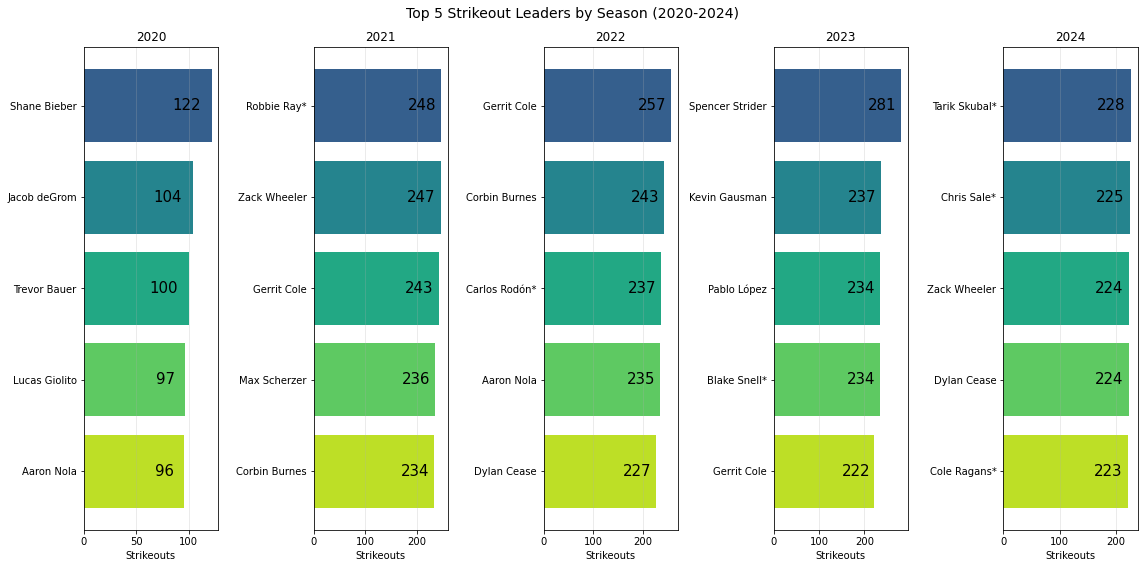

In [24]:
if top_so_by_year and not player_pitching_df.empty:
    fig, axes = plt.subplots(1, 5, figsize=(16, 8))  # removed sharey=True
    
    for idx, (year, df) in enumerate(sorted(top_so_by_year.items())):
        ax = axes[idx]
        pitchers = [str(row['Name']) for _, row in df.iterrows()]
        strikeouts = df['SO'].values
        
        bars = ax.barh(range(len(pitchers)), strikeouts, color=plt.cm.viridis(np.linspace(0.3, 0.9, len(pitchers))))
        ax.set_yticks(range(len(pitchers)))
        ax.set_yticklabels(pitchers, fontsize=10)
        ax.set_xlabel('Strikeouts', fontsize=10)
        ax.set_title(f'{year}', fontsize=12)
        ax.invert_yaxis()
        ax.grid(axis='x', alpha=0.3)
        
        # Add labels inside bars
        for i, (bar, so) in enumerate(zip(bars, strikeouts)):
            ax.text(so - 10, i, str(int(so)), va='center', ha='right', 
                    fontsize=15, color='black')
        
        # Set x-axis limit with padding
        ax.set_xlim(0, max(strikeouts) * 1.05)
    
    fig.suptitle('Top 5 Strikeout Leaders by Season (2020-2024)', fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()


### Now we can see the top pitcher leaders for each year. The names vary each year, and the numbers don’t follow a clear pattern some years are lower than others. This could be affected by the number of games played that year. Another interesting question could be whether there’s a correlation between pitchers with the most strikeouts and teams with the most strikeouts.

# Citation :

### Google. "Gemini." Google, 12 Nov. 2025, https://gemini.google.com/.

### Sports Reference LLC. (n.d.). Baseball-Reference.com. Retrieved November 12, 2025, from https://www.baseball-reference.com/

### Deitel, P., & Deitel, H. (2020). Intro to Python for computer science and data science: Learning to program with AI, big data and the cloud (1st ed.). Pearson.